In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))


import numpy as np
from scipy.optimize import differential_evolution
from stress_strain_analysis import stress_strain_analysis
from mesh import Mesh
import geometry

# Define your geometry and mesh
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = Mesh(ReinforcedConcrete, "triangle", 25)

In [42]:
import time
# Initialize the stress-strain analysis
analysis = stress_strain_analysis(Mesh, Nx=80, My=13)

def callback(xk, convergence):
    residual = analysis.find_strain_and_curvature(xk)
    print(f"Residual: {residual}")
    return residual < 1e-9  # Stop when condition is met

# Define bounds for eps and xsi
bounds = [(-0.01, 0.01), (-0.1, 0.1)]
start_time = time.perf_counter()
result = differential_evolution(analysis.find_strain_and_curvature, 
                                bounds=bounds, 
                                callback=callback,
                                tol=1e-6,  # Additional tolerance setting
                                strategy='best1bin', 
                                maxiter=1000)

# End timing
end_time = time.perf_counter()

# Calculate elapsed time
elapsed_time = end_time - start_time

print("Optimal solution:", result.x)
print("Number of iterations:", result.nit)
print("Minimum residual:", result.fun)
print(f"Execution Time: {elapsed_time:.4f} seconds")

Residual: 299.7675459394169
Residual: 299.7675459394169
Residual: 265.4665747773909
Residual: 254.03679580637578
Residual: 211.4072109415581
Residual: 211.4072109415581
Residual: 173.98940262459814
Residual: 93.2195450453755
Residual: 93.2195450453755
Residual: 61.83940025547656
Residual: 61.83940025547656
Residual: 51.718794693806345
Residual: 50.43806699571556
Residual: 50.43806699571556
Residual: 50.43806699571556
Residual: 50.07753844121177
Residual: 50.07753844121177
Residual: 50.07753844121177
Residual: 7.522344164263387
Residual: 7.044168839608675
Residual: 7.044168839608675
Residual: 3.1689926899856813
Residual: 2.4780318469076055
Residual: 0.6764803868478668
Residual: 0.6764803868478668
Residual: 0.6764803868478668
Residual: 0.6764803868478668
Residual: 0.6764803868478668
Residual: 0.020097467034986032
Residual: 0.020097467034986032
Residual: 0.020097467034986032
Residual: 0.002605503326822142
Residual: 0.0010341146625877768
Residual: 0.0010341146625877768
Residual: 3.49685524

7.255235878731448e-06 7.365839723272316e-07
Nx =  79.99678163510548 kN
My =  13.000931961883673 kNm


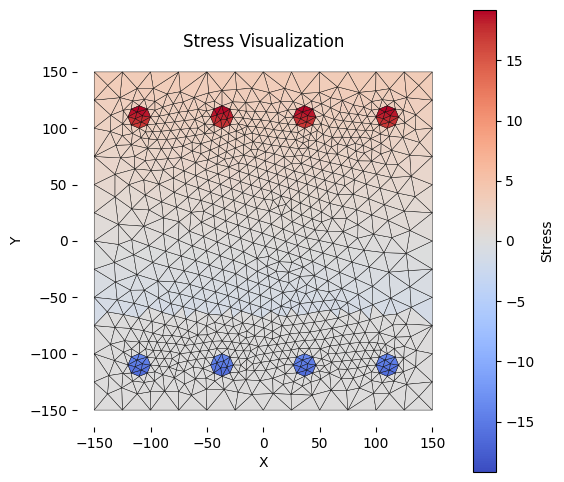

In [3]:
eps, xsi = result.x
print(eps, xsi)
analysis.set_strain_and_curvature(eps, xsi)
analysis.calculate_strains()
analysis.calculate_stresses()
print("Nx = ", analysis.get_section_forces()[0], "kN")
print("My = ", analysis.get_section_forces()[1], "kNm")
analysis.plot_stresses()